Firsly, Importing the necessary libraries for visualization and data manipulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Reading the excel file
Then, reading the excel file with `pd.read_excel`, dropping `NaN` columns using df.dropna(), showing the dataframe first 5 rows with df.head()

In [2]:
df = pd.read_excel("/content/Part2Ans.xlsx", usecols=["BTC Annual return","ETH Annual return","SOL Annual return","BTC Excess return", "ETH Excess return","SOL Excess return", "BTC STDEV", "ETH STDEV", "SOL STDEV"]    )
print(df.head())
df=df.dropna()
print(df.head())

   BTC Annual return  ETH Annual return  SOL Annual return  BTC Excess return  \
0           0.371854           0.190331           0.534439           0.371472   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   ETH Excess return  SOL Excess return  BTC STDEV  ETH STDEV  SOL STDEV  
0           0.189948           0.534056   0.028451   0.035628   0.052816  
1                NaN                NaN        NaN        NaN        NaN  
2                NaN                NaN        NaN        NaN        NaN  
3                NaN                NaN        NaN        NaN        NaN  
4                NaN                NaN        NaN        NaN        NaN  
   BTC Annual return  ETH Annual return  SOL Annual return  BTC

# Melting the DataFrame
Then, using `pd.melt` to reshape a DataFrame fom a wide format to a long format. It turns columns into rows, so i can work with several columns just in one DataFrame
Also  leaving only cryptocurrencies names, so they dont bother us in the plots

In [3]:
annreturn=pd.melt(df[["BTC Annual return","ETH Annual return","SOL Annual return"]], var_name="Crypto", value_name="Value")
annreturn["Crypto"]=annreturn["Crypto"].str.replace("Annual return","")
excess=pd.melt(df[["BTC Excess return","ETH Excess return","SOL Excess return"]], var_name="Crypto", value_name="Value")
excess["Crypto"]=annreturn["Crypto"].str.replace("Excess return","")
stdev=pd.melt(df[["BTC STDEV","ETH STDEV","SOL STDEV"]], var_name="Crypto", value_name="Value")
stdev["Crypto"]=annreturn["Crypto"].str.replace("STDEV","")

# Creating the bars

Setting up figure size with `plt.figure`, using `gridspec` to create a 2x2 figure with 3 charts on it.

Creating 3 barplots, 2 at the top and one at the bottom. adding edges to bars using `edgecolor`and `linewidth`, setting the `deep` palette, setting up fontsizes for labels and title, rotating the labels.

Creating one big title with `fig.suptitle`, tightening up the layout with plt.tight_layout

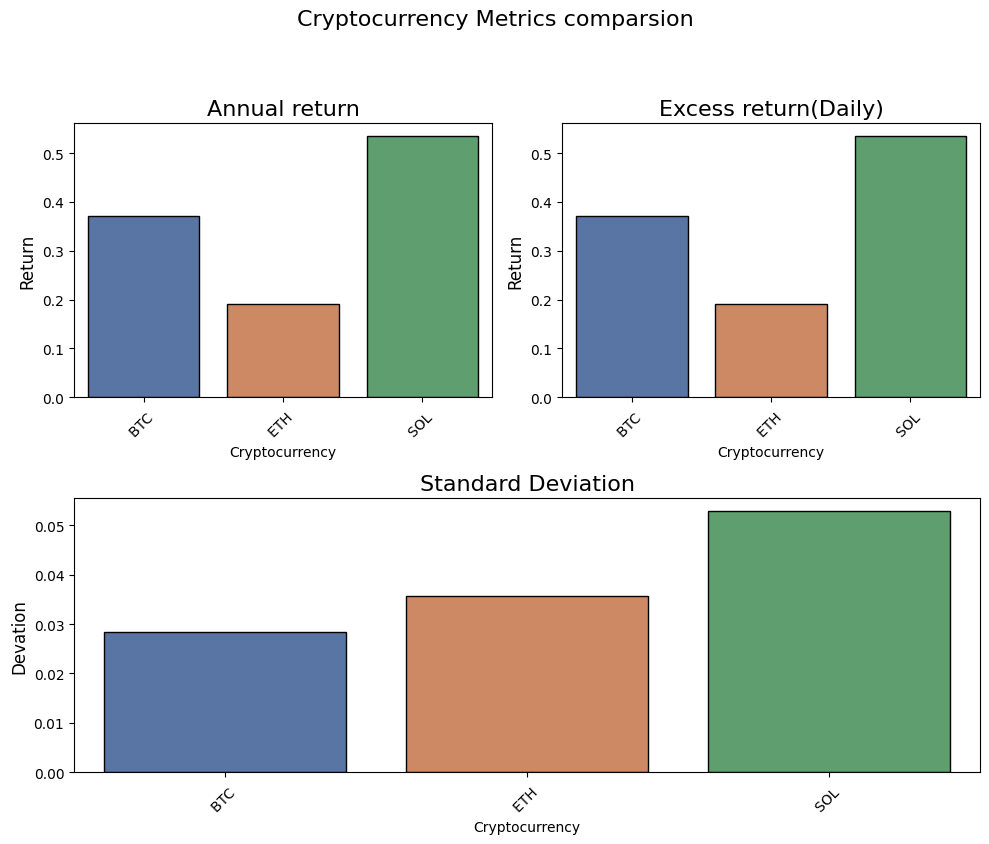

In [6]:
fig=plt.figure(figsize=(10,8))
gs=gridspec.GridSpec(2,2, figure=fig)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,:])

sns.barplot(data=annreturn, x="Crypto",y="Value", hue="Crypto", palette="deep",edgecolor="black", linewidth=1, ax=ax1 )
ax1.set_title("Annual return", fontsize=16)
ax1.set_ylabel("Return", fontsize=12)
ax1.set_xlabel("Cryptocurrency", fontsize=10)
ax1.tick_params(axis="x", rotation=45)

sns.barplot(data=excess, x="Crypto",y="Value", hue="Crypto", palette="deep",edgecolor="black", linewidth=1, ax=ax2 )
ax2.set_title("Excess return(Daily)", fontsize=16)
ax2.set_ylabel("Return", fontsize=12)
ax2.set_xlabel("Cryptocurrency", fontsize=10)
ax2.tick_params(axis="x", rotation=45)

sns.barplot(data=stdev, x="Crypto",y="Value", hue="Crypto", palette="deep",edgecolor="black", linewidth=1, ax=ax3)
ax3.set_title("Standard Deviation", fontsize=16)
ax3.set_ylabel("Devation", fontsize=12)
ax3.set_xlabel("Cryptocurrency", fontsize=10)
ax3.tick_params(axis="x", rotation=45)

fig.suptitle("Cryptocurrency Metrics comparsion", fontsize=16,y=1.05)
plt.tight_layout()
plt.show()